In [5011]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5012]:
df= pd.read_csv('data/Housing.csv')
df #dataset before preprocessing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5013]:
bin_col=['mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea']
for col in bin_col:
    df[col] = df[col].str.lower().map({'yes': 1, 'no': 0}) #mapping boolean values to their integer equivalent

In [5014]:
df=df.join(pd.get_dummies(df.furnishingstatus)).drop(['furnishingstatus'],axis=1)
df= df.drop(['unfurnished'],axis=1) #dropping to prevent perfect multicollinearity
df[['furnished','semi-furnished']] = df[['furnished','semi-furnished']].astype(int)
df #dataset after preprocessing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0


In [5015]:
df.query('area > 12500')
df=df.drop([10,211,403,7,125,66,271,536,146, 186, 222, 224, 277]) # dropping outliers

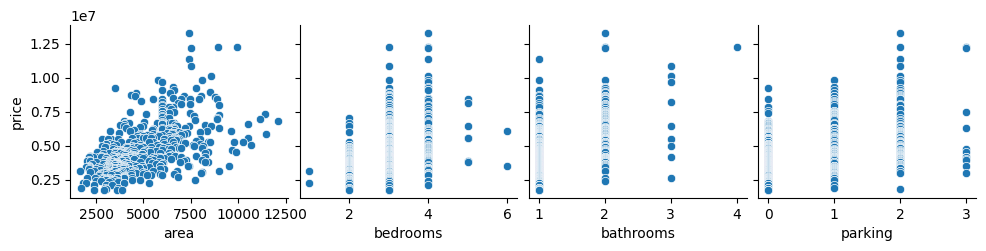

In [5016]:
sns.pairplot(x_vars=['area','bedrooms','bathrooms','parking'],y_vars=['price'],data=df)

Feature Engineering

In [5017]:
df['area_per_bedroom']=df['area']/df['bedrooms']
df['area_per_bathroom']=df['area']/df['bathrooms']

In [5018]:
from sklearn.model_selection import train_test_split
X= df.drop(['price'],axis=1)
Y=df['price']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
train_data=X_train.join(Y_train)
train_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,area_per_bedroom,area_per_bathroom,price
382,3150,3,1,2,1,0,1,0,0,0,0,1,0,1050.000000,3150.0,3570000
237,5010,3,1,2,1,0,1,0,0,0,0,0,1,1670.000000,5010.0,4620000
510,2880,3,1,1,0,0,0,0,0,0,0,0,0,960.000000,2880.0,2520000
307,4080,3,1,2,1,0,0,0,0,2,0,0,1,1360.000000,4080.0,4165000
111,8372,3,1,3,1,0,0,0,1,2,0,0,0,2790.666667,8372.0,6090000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,3420,2,1,2,1,0,0,1,0,1,0,0,1,1710.000000,3420.0,3780000
408,4000,2,1,1,1,0,0,0,0,0,0,0,0,2000.000000,4000.0,3430000
71,6000,4,2,4,1,0,0,0,1,0,0,0,0,1500.000000,3000.0,6755000
495,4000,3,1,2,1,0,0,0,0,1,0,0,0,1333.333333,4000.0,2730000


In [5019]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
numeric_col=['stories','bedrooms','bathrooms','area','parking','area_per_bedroom','area_per_bathroom']
train_data[numeric_col]=scale.fit_transform(train_data[numeric_col]) #Scaling features

In [5020]:
train_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,area_per_bedroom,area_per_bathroom,price
382,-0.951019,0.042847,-0.567415,0.184069,1,0,1,0,0,-0.784153,0,1,0,-0.969816,-0.586807,3570000
237,0.012071,0.042847,-0.567415,0.184069,1,0,1,0,0,-0.784153,0,0,1,-0.108836,0.422982,4620000
510,-1.090823,0.042847,-0.567415,-0.966363,0,0,0,0,0,-0.784153,0,0,0,-1.094797,-0.733389,2520000
307,-0.469474,0.042847,-0.567415,0.184069,1,0,0,0,0,1.538251,0,0,1,-0.539326,-0.081912,4165000
111,1.752883,0.042847,-0.567415,1.334501,1,0,0,0,1,1.538251,0,0,0,1.447408,2.248204,6090000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,-0.811216,-1.357911,-0.567415,0.184069,1,0,0,1,0,0.377049,0,0,1,-0.053289,-0.440225,3780000
408,-0.510897,-1.357911,-0.567415,-0.966363,1,0,0,0,0,-0.784153,0,0,0,0.349427,-0.125344,3430000
71,0.524684,1.443604,1.511477,2.484932,1,0,0,0,1,-0.784153,0,0,0,-0.344911,-0.668242,6755000
495,-0.510897,0.042847,-0.567415,0.184069,1,0,0,0,0,0.377049,0,0,0,-0.576357,-0.125344,2730000


Fitting Linear Regression Model

In [5021]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [5022]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
Y_predict=lreg.predict(X_test)
mae = mean_absolute_error(Y_test, Y_predict)
mse = mean_squared_error(Y_test, Y_predict)
rsq = r2_score(Y_test, Y_predict)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {rsq}")

MAE: 726056.4401362413
MSE: 877647588677.5952
R²: 0.771381413854457


MAE: Mean Absolute error, measures the average error produced by the model's predictions, its units are the same as target value's units (Price) (lower is better)
MSE: Mean Squared Error, measures average of the square of difference between Actual value and Model's prediction (lower is better)
R^2: explains the variance in the target variable (higher is better)

lists down the coefficients assigned to each feature, 1 unit increase in a feature will result in 'coeff' unit increase in the target value i.e. Price (assuming other features remain same)

Plotting Regression Line

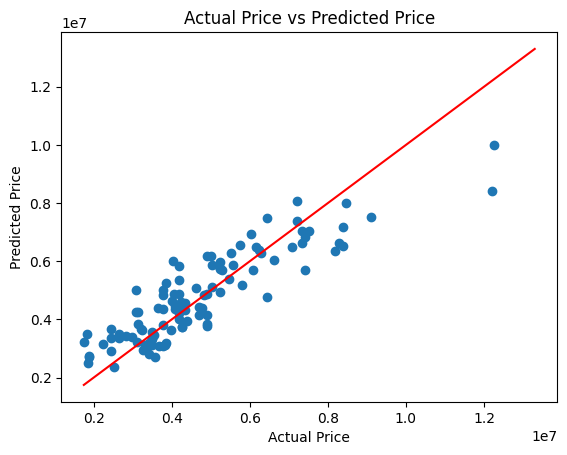

In [5023]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, Y_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red')  # Ideal line
plt.show()

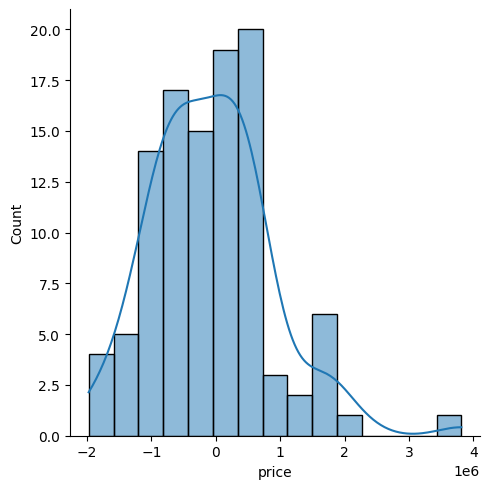

In [5024]:
sns.displot((Y_test-Y_predict),bins=15,kde=True)
plt.show()

Interpreting coefficients

In [5025]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lreg.coef_
})
coefficients

,Feature,Coefficient
0,area,4.263220e+02
1,bedrooms,1.308243e+05
2,bathrooms,4.031959e+05
3,stories,3.610079e+05
4,mainroad,3.494107e+05
5,guestroom,3.552240e+05
6,basement,3.316518e+05
7,hotwaterheating,1.073075e+06
8,airconditioning,8.900011e+05
9,parking,2.901136e+05


lists down the coefficients assigned to each feature, 1 unit increase in a feature will result in 'coeff' unit increase in the target value i.e. Price (assuming other features remain same)

airconditioning has the highest impact on price 
features like AC, hot water heating, bathrooms, and stories are top determiners
Location-related features (mainroad, prefarea) have large effects too

